In [59]:
import json
from matplotlib import pyplot as plt
import numpy as np

import statistics

In [60]:
n_gen = 200  #  number of generatons
n = 10  #  number of generations to group

Read files

In [61]:
with open("Results_vehicle_ga.json", "r") as f:
    ga = json.load(f)

In [62]:
with open("Results_vehicle_mo.json", "r") as f:
    mo = json.load(f)

In [63]:
with open("Results_vehicle_ran.json", "r") as f:
    ran = json.load(f)

In [ ]:
Group evaluaitons by generations of n

In [64]:
mo_by_generation = {}
for i in range(0, n_gen, n):
    mo_by_generation[i] = []

In [65]:
ga_by_generation = {}
for i in range(0, n_gen, n):
    ga_by_generation[i] = []

In [66]:
ran_by_generation = {}
for i in range(0, n_gen, n):
    ran_by_generation[i] = []

In [67]:
n_gen_res = []
for i, run in enumerate(ran):
    for m in range(0, len(ran[run]["fitness"]), n):
        ran_by_generation[m].append(ran[run]["fitness"][m])

In [68]:

for i, run in enumerate(mo):
    #print(len(mo[run]["fitness"]))
    for m in range(0, len(mo[run]["fitness"]), n):
        mo_by_generation[m].append(mo[run]["fitness"][m])

In [69]:

for i, run in enumerate(ga):
    for m in range(0, len(ga[run]["fitness"]), n):
        #print(type(ga_by_generation[m]))
        ga_by_generation[m].append(ga[run]["fitness"][m])

Evaluate the novelty

In [88]:
mo_novelty = []
for i, run in enumerate(mo):
    mo_novelty.append(-mo[run]["novelty_20"])

In [89]:
ga_novelty = []
for i, run in enumerate(ga):
    ga_novelty.append(-ga[run]["novelty_20"])

Evaluate average time

In [95]:
mo_time = []
for i, run in enumerate(mo):
    mo_time.append(mo[run]["time"])
sum(mo_time)/len(mo_time)

1140.374314174056

In [96]:
ga_time = []
for i, run in enumerate(ga):
    ga_time.append(ga[run]["time"])
sum(ga_time)/len(ga_time)

1391.7791401545207

Build graphs

In [101]:
def build_boxplot(y1, x1):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    
    ax1.set_xlabel('Type of algorithm', fontsize=16)
    ax1.set_ylabel('Average novelty', fontsize=16)
    
    ax1.set_xticklabels(x1, fontsize=16, rotation=45)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.5)
    top = 12
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)   
    ax1.tick_params(axis='y', labelsize=16)

<ipython-input-101-d8e9d6feedc9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=45)


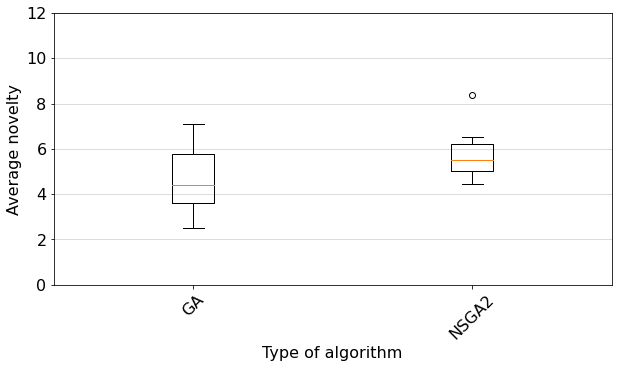

In [102]:
build_boxplot([ga_novelty, mo_novelty], ["GA", "NSGA2"] )

In [106]:
def build_boxplot_time(y1, x1):
    fig, ax1 = plt.subplots(figsize=(20, 10))
    
    ax1.set_xlabel('Type of algorithm', fontsize=16)
    ax1.set_ylabel('Time for 50 000 evaluations, sec', fontsize=16)
    ax1.set_xticklabels(x1, fontsize=16, rotation=45)
    
    ax1.yaxis.grid(True, linestyle='-', which='major', color='darkgray', alpha=0.5)

    top = 1800
    bottom = 0
    ax1.set_ylim(bottom, top)
    ax1.boxplot(y1)
    
    ax1.tick_params(axis='y', labelsize=16)

<ipython-input-106-47d933c99d24>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, fontsize=16, rotation=45)


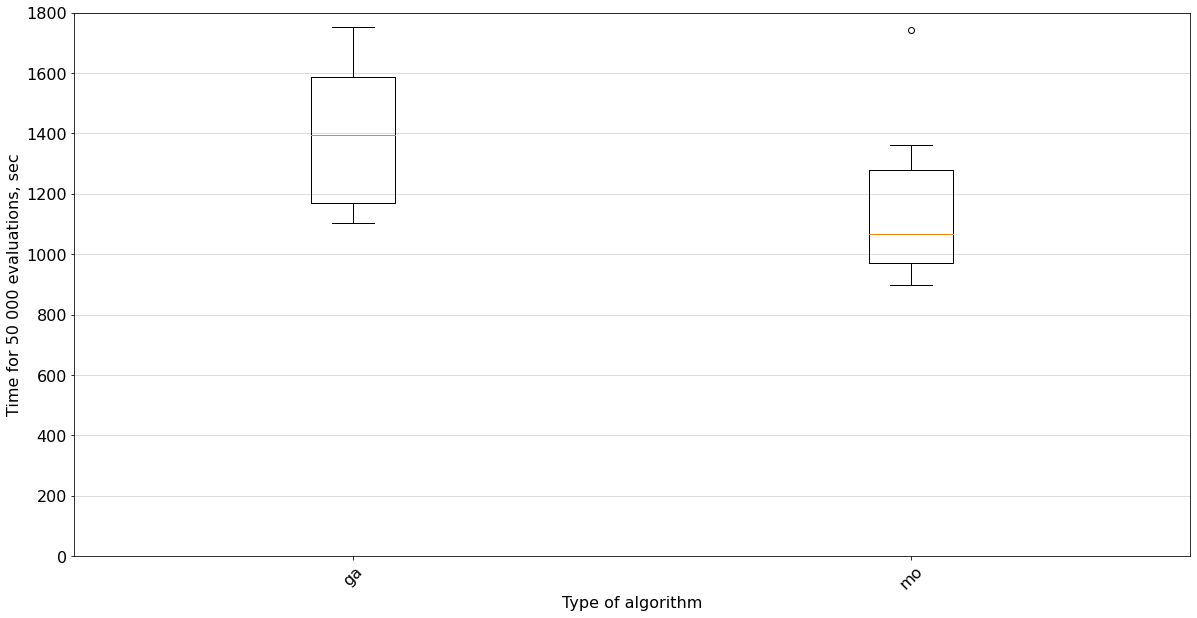

In [107]:
build_boxplot_time([ga_time, mo_time], ["ga", "mo"] )

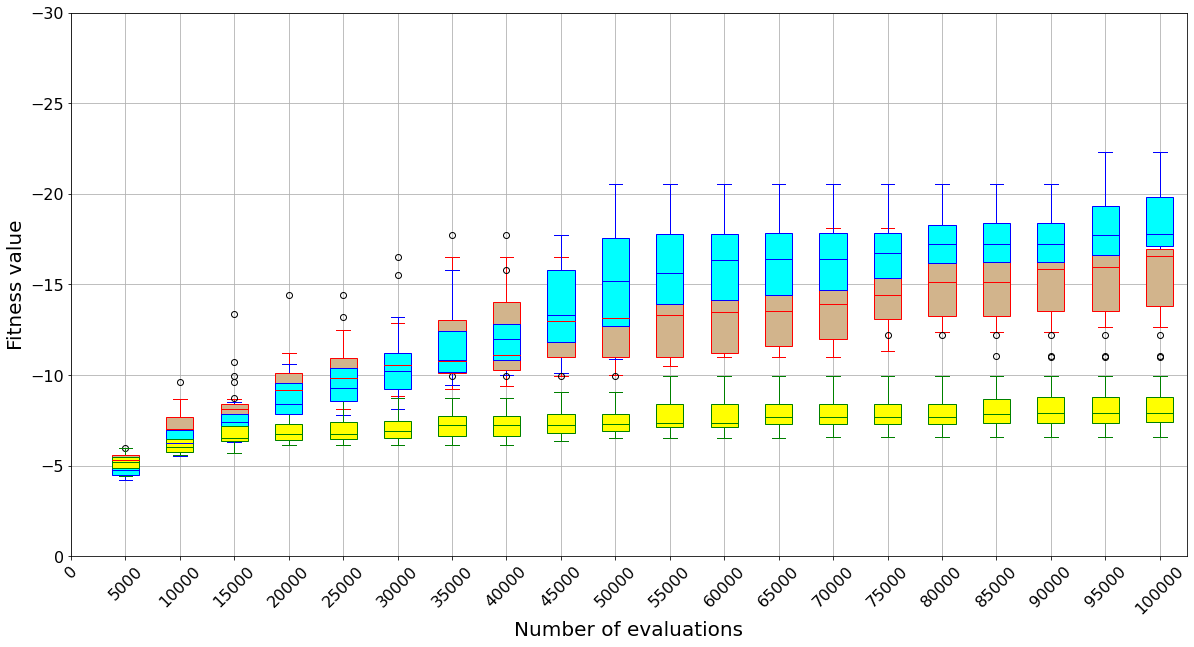

In [108]:
import matplotlib.pyplot as plt

def box_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True, labels=None)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  
        
x = range(0, 21, 1)
        
x1 = range(0, 105000, 5000)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('Number of evaluations', fontsize=20)
ax.set_ylabel('Fitness value', fontsize=20)


box_plot([ga_by_generation[v] for v in ga_by_generation], 'red', 'tan')
box_plot([mo_by_generation[v] for v in mo_by_generation], 'blue', 'cyan')
box_plot([ran_by_generation[v] for v in ran_by_generation], 'green', 'yellow')

ax.set_xticks(x)
ax.set_ylim(0, -30)
ax.set_xticklabels(x1, fontsize=16, rotation=45)
ax.tick_params(axis='y', labelsize=16)
ax.grid(True)


Do statistical tests

In [77]:
ga_by_generation[190]

[-17.0658949126487,
 -16.517723629346733,
 -17.578279837063565,
 -13.804725525357119,
 -18.111025063338264,
 -16.924950203671415,
 -13.791610985621944,
 -16.570591837980384,
 -13.48142817228124,
 -16.818541210270723,
 -12.672611715679674,
 -15.29147421397275]

In [78]:
mo_by_generation[190]

[-16.329191136793497,
 -19.68492141393947,
 -16.801491315208,
 -17.807604851300166,
 -18.105055573410084,
 -17.440297717842963,
 -17.673136705529917,
 -16.860270041595967,
 -16.462529165092626,
 -17.72251760836698,
 -17.8660338619736,
 -20.31334713505603,
 -22.31948609609598,
 -17.209751227414905,
 -20.95659178077667,
 -20.432615731271174]

In [79]:
from scipy.stats import mannwhitneyu
mannwhitneyu(ga_by_generation[190],mo_by_generation[190], alternative="two-sided")

MannwhitneyuResult(statistic=160.0, pvalue=0.0031992657677819237)

In [80]:
from cliffsDelta import cliffsDelta
d, res = cliffsDelta(ga_by_generation[190],mo_by_generation[190] )
(d, res)

(0.6666666666666666, 'large')

In [94]:
mannwhitneyu(ga_novelty,mo_novelty, alternative="two-sided")

MannwhitneyuResult(statistic=56.0, pvalue=0.06669238045530092)